# Datos descargados de: https://www.pmel.noaa.gov/tao/drupal/disdel/



---
# AUTOR : Michael De La Cruz La Rosa
### 20180176@lamolina.edu.pe
### Michael.dlc.lr@gmail.com
# HISTÓRICO DE TEMPERATURA SUB SUPERFICIAL DEL MAR DE LA BOYA UBICADA EN 0°N 170°W

---



In [1]:
# Conectando google drive con colab:
#-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
#-------------------------------------
import os
path = '/content/drive/MyDrive/Colab Notebooks/OCEANOGRAFIA/OCEANOGRAFIA/' # Ruta del directorio de trabajo
os.chdir(path)

Mounted at /content/drive/


In [11]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ds = xr.open_dataset(path + 't0n170w_dy.cdf',
                       drop_variables = ['time_bnds','ST_6020','QT_5020','ZSST_2003','depzsst']) # Eliminamos variable inservibles.
ds['time'] = pd.date_range(ds.time[0].values, ds.time[-1].values, freq = 'D')
# =============================================================================
# En este caso vamos a eliminar lat y lon ya que no lo utilizaremos:
ds = ds.sel(lat=ds.lat, lon=ds.lon, method='nearest').squeeze(drop=True)
ds

<xarray.Dataset>
Dimensions:  (time: 13030, depth: 20)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 1.0 5.0 9.0 10.0 13.0 ... 200.0 250.0 300.0 500.0
Data variables:
    T_20     (time, depth) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                06:19 19-JAN-2024

In [5]:
# Contar la cantidad de valores en cada profundidad
prof_count = ds['T_20'].count(dim='time')
prof_count

<xarray.DataArray 'T_20' (depth: 20)>
array([10468,  5461,   120,  7734,  1421, 11478,   120, 11222,  2039,
       10862, 10635,  2039, 11617, 11533,  2039,   108, 11617, 11540,
       11553, 11385])
Coordinates:
  * depth    (depth) float32 1.0 5.0 9.0 10.0 13.0 ... 200.0 250.0 300.0 500.0

In [6]:
# Vamos a eliminar las profundidades que tengan mayores datos vacíos
# Superior al (50% del máximo de datos)
# =============================================================================
# Calcular el 50% del máximo número de valores
umbral = 0.5 * prof_count.max()

# Filtrar las profundidades basadas en la condición
prof_validas = prof_count.where(prof_count >= umbral, drop=True)
prof_validas

<xarray.DataArray 'T_20' (depth: 12)>
array([10468.,  7734., 11478., 11222., 10862., 10635., 11617., 11533.,
       11617., 11540., 11553., 11385.])
Coordinates:
  * depth    (depth) float32 1.0 10.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0

In [7]:
# ASIGNAMOS NUEVAMENTE A LA VARIABLE INICIAL
ds_ga = ds['T_20'].where(prof_count >= umbral, drop=True)
ds_ga # Observamos que existen valores nan, necesitamos realizar
# una o más de una interpolación

<xarray.DataArray 'T_20' (time: 13030, depth: 12)>
array([[27.46    ,       nan,       nan, ..., 12.4     , 11.29    ,
         8.34    ],
       [27.36    ,       nan,       nan, ..., 12.86    , 11.79    ,
         8.41    ],
       [27.34    ,       nan,       nan, ..., 13.12    , 11.69    ,
         8.33    ],
       ...,
       [29.140364, 29.135174, 29.111311, ..., 12.346255, 12.024926,
         8.951339],
       [29.218422, 29.16115 , 29.12154 , ..., 12.354647, 12.093337,
         8.907393],
       [29.17339 , 29.123938, 29.085659, ..., 12.427791, 12.037096,
         8.719049]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 1.0 10.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
Attributes:
    name:            T
    long_name:       TEMPERATURE (C)
    generic_name:    temp
    FORTRAN_format:  f10.2
    units:           C
    epic_code:       20

# Interpolación

In [8]:
# Interpolación Lineal
ds_ga = ds_ga.interpolate_na(dim='time', method = 'linear')
ds_ga

<xarray.DataArray 'T_20' (time: 13030, depth: 12)>
array([[27.46    ,       nan,       nan, ..., 12.4     , 11.29    ,
         8.34    ],
       [27.36    ,       nan,       nan, ..., 12.86    , 11.79    ,
         8.41    ],
       [27.34    ,       nan,       nan, ..., 13.12    , 11.69    ,
         8.33    ],
       ...,
       [29.140364, 29.135174, 29.111311, ..., 12.346255, 12.024926,
         8.951339],
       [29.218422, 29.16115 , 29.12154 , ..., 12.354647, 12.093337,
         8.907393],
       [29.17339 , 29.123938, 29.085659, ..., 12.427791, 12.037096,
         8.719049]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 1.0 10.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
Attributes:
    name:            T
    long_name:       TEMPERATURE (C)
    generic_name:    temp
    FORTRAN_format:  f10.2
    units:           C
    epic_code:       20

In [13]:
# Interpolación Cúbica
ds_ga_interp = ds_ga.interpolate_na(dim='depth', method = 'cubic',fill_value="extrapolate")
ds_ga_interp = ds_ga_interp.T
ds_ga_interp

<xarray.DataArray 'T_20' (depth: 12, time: 13030)>
array([[27.46    , 27.36    , 27.34    , ..., 29.140364, 29.218422,
        29.17339 ],
       [27.325958, 27.159323, 26.764397, ..., 29.135174, 29.16115 ,
        29.123938],
       [27.234158, 27.031246, 26.506285, ..., 29.111311, 29.12154 ,
        29.085659],
       ...,
       [12.4     , 12.86    , 13.12    , ..., 12.346255, 12.354647,
        12.427791],
       [11.29    , 11.79    , 11.69    , ..., 12.024926, 12.093337,
        12.037096],
       [ 8.34    ,  8.41    ,  8.33    , ...,  8.951339,  8.907393,
         8.719049]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 1.0 10.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
Attributes:
    name:            T
    long_name:       TEMPERATURE (C)
    generic_name:    temp
    FORTRAN_format:  f10.2
    units:           C
    epic_code:       20

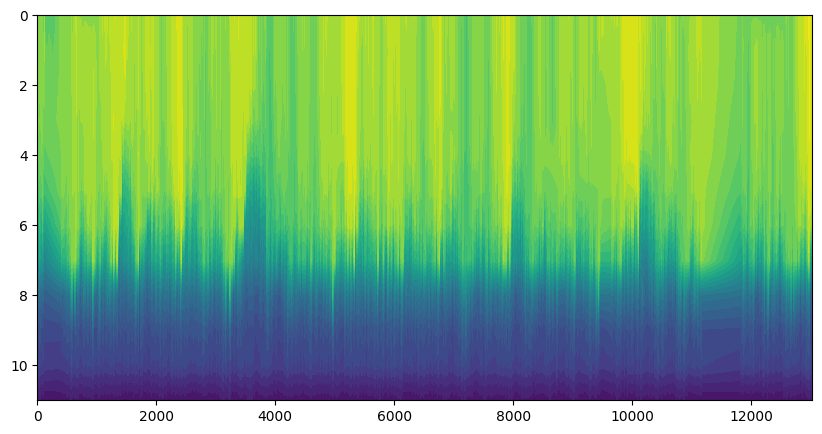

In [14]:
# DESPUÉS DE INTERPOLAR:
fig , ax = plt.subplots(figsize=(10,5))
ax.contourf(ds_ga_interp,29);
# Invertimos el eje y
ax.invert_yaxis()



---


 # CALCULAMOS EL PROMEDIO HISTÓRICO DIARIO (CLIM: 1991-01-01 - 2020-12-31)

---



In [15]:
# Calcular el promedio climatológico de cada día del año
Inicio = '1991-01-01'
Fin = '2020-12-31'
clim = ds_ga_interp.sel(time=slice(Inicio, Fin)).groupby('time.dayofyear').mean(dim='time')
clim

<xarray.DataArray 'T_20' (depth: 12, dayofyear: 366)>
array([[27.693233, 27.680317, 27.71562 , ..., 27.697563, 27.691881,
        27.401897],
       [27.674086, 27.661993, 27.690092, ..., 27.628962, 27.618134,
        27.28927 ],
       [27.674625, 27.66785 , 27.689838, ..., 27.605358, 27.600628,
        27.255161],
       ...,
       [12.883016, 12.954919, 12.967249, ..., 12.957196, 12.917304,
        12.984313],
       [11.730791, 11.732901, 11.739288, ..., 11.734475, 11.718018,
        11.69828 ],
       [ 8.291036,  8.27172 ,  8.32311 , ...,  8.241551,  8.283825,
         8.315618]], dtype=float32)
Coordinates:
  * depth      (depth) float32 1.0 10.0 25.0 50.0 ... 200.0 250.0 300.0 500.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Attributes:
    name:            T
    long_name:       TEMPERATURE (C)
    generic_name:    temp
    FORTRAN_format:  f10.2
    units:           C
    epic_code:       20



---
# GRAFICAMOS

---




In [35]:
from scipy.ndimage import gaussian_filter # Para realizar un suavizado
import datetime
def Clim(data,sigma):
  fig, ax = plt.subplots(figsize=(8, 7))
  # Definir niveles de temperatura
  # -----------------------------------------------------------------------------------------
  # Suavizado de contornos y countor fill
  sigma = sigma
  interp_temp_smooth = gaussian_filter(data, sigma=sigma)
  # -----------------------------------------------------------------------------------------
  # Graficar mapa de colores suavizado
  levels = np.arange(7, data.max()+1, 1)
  cs = ax.contourf(data.dayofyear, data.depth, interp_temp_smooth, levels, cmap= "hsv_r")

  # Líneas de contorno con suavizado
  cs2 = ax.contour(data.dayofyear, data.depth, interp_temp_smooth, colors='black', levels=levels, linewidths=1, linestyles='-')

  # # Agregar etiquetas a las líneas de contorno
  ax.clabel(cs2, fmt='%2.0f', colors='black', fontsize=10)
  # -----------------------------------------------------------------------------------------
  # Invertir el eje y y establecer límites y escala del eje y
  ax.invert_yaxis()
  ax.set_ylim(350, 0) # Hasta 500m de profundidad
  ax.set_yticks(range(0, 351, 50))
  # -----------------------------------------------------------------------------------------
  # Agregar barra de colores
  cbar = fig.colorbar(cs, ax=ax, ticks=np.arange(7, data.max()+1, 2))
  cbar.outline.set_linewidth(1)
  cbar.ax.tick_params(labelsize=10)
  # -----------------------------------------------------------------------------------------
  # # Cambiar etiquetas del eje x a los nombres de los meses
  months = [datetime.date(2000, m, 1).strftime('%b') for m in range(1, 13)]
  ax.set_xticks(np.linspace(1, 365-31, num=12))
  ax.set_xticklabels(months, fontsize = 10)
  #-----------------------------------------------------------------------------------------
  ax.set_title(f"Temperatura SubSuperficial: Histórico (1991-2020)\nBoya: {ds.attrs['site_code']}", fontsize=12, color = 'black')
  ax.xaxis.label.set_color('black')
  ax.yaxis.label.set_color('black')
  ax.tick_params(colors='black')

  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10)
  ax.set_xlabel('')

  plt.text(0, -0.08, 'Fuente de datos: NOAA [TAO/TRITON]',  fontsize=10, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  #-----------------------------------------------------------------------------------------

  fig.savefig(path + f'PerfilTempSub.png',
                  transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  # Mostrar gráfico
  plt.show()
  plt.close()

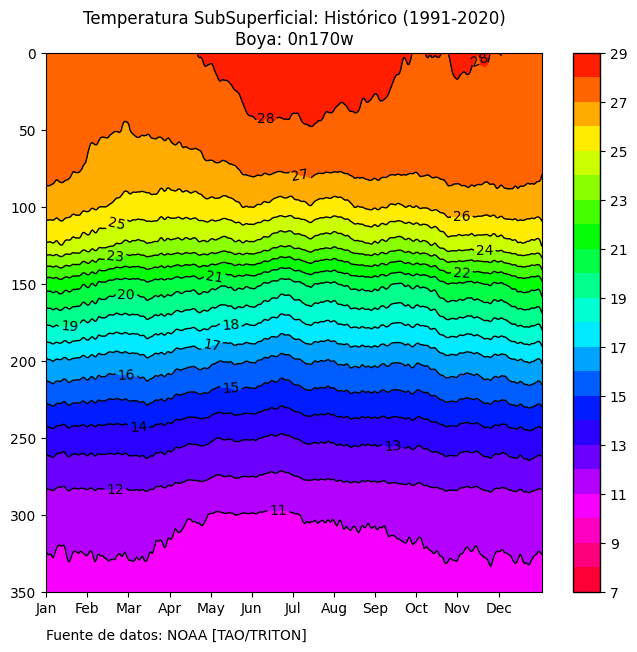

In [36]:
Clim(clim, 0.85) # Aumentando el valor de 0 puedes cambiar el suavizado.
# Esto es equivalente a la triangulación con interpolación lineal con 10000



---
# Los datos utilizados se encuentran en el siguiente link:
https://drive.google.com/drive/folders/1zo4Uq3XS9KKn_I2Ei1J_FiYu4QryQnNt



---

